In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys; sys.path.append('modules'); from utils import *
params = {'legend.fontsize': 18,
          'figure.figsize': (10, 6),
          'axes.labelsize':  18,
          'axes.titlesize':  18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'image.cmap':'jet',
          'lines.markersize': 5 }
plt.rcParams.update(params)

In [2]:
df = pd.read_csv('doros.csv', comment='#', header=None, names = ['turn','Acq','BPMSW.1L1.B1oscH','BPMSW.1L1.B1oscV','BPMSW.1L1.B2oscH','BPMSW.1L1.B2oscV','BPMSW.2L1.B1oscH','BPMSW.2L1.B1oscV','BPMSW.2L1.B2oscH','BPMSW.2L1.B2oscV','BPMSW.1R1.B1oscH','BPMSW.1R1.B1oscV','BPMSW.1R1.B2oscH','BPMSW.1R1.B2oscV','BPMSW.2R1.B1oscH','BPMSW.2R1.B1oscV','BPMSW.2R1.B2oscH','BPMSW.2R1.B2oscV'])

# Amplitude

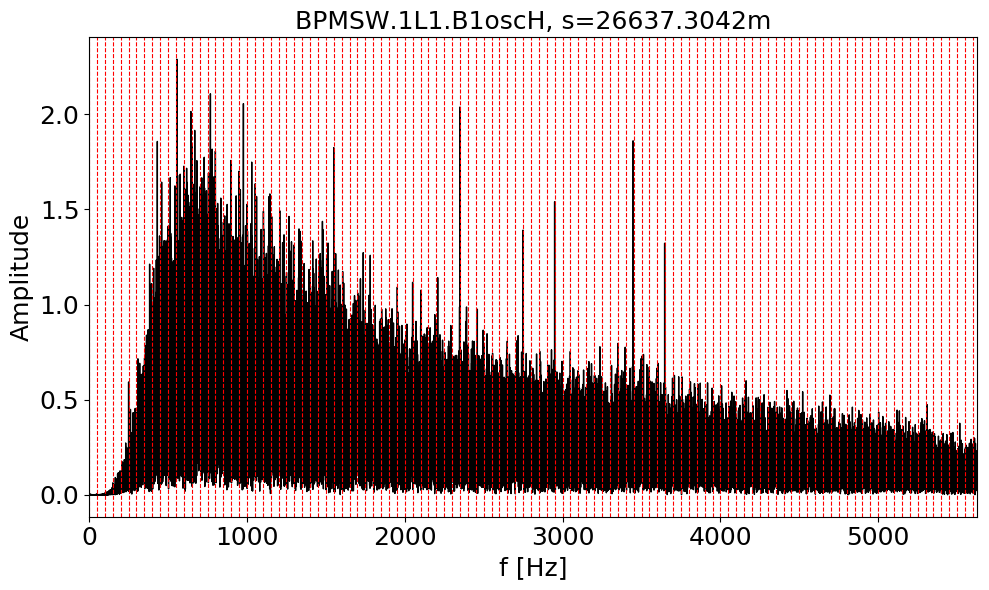

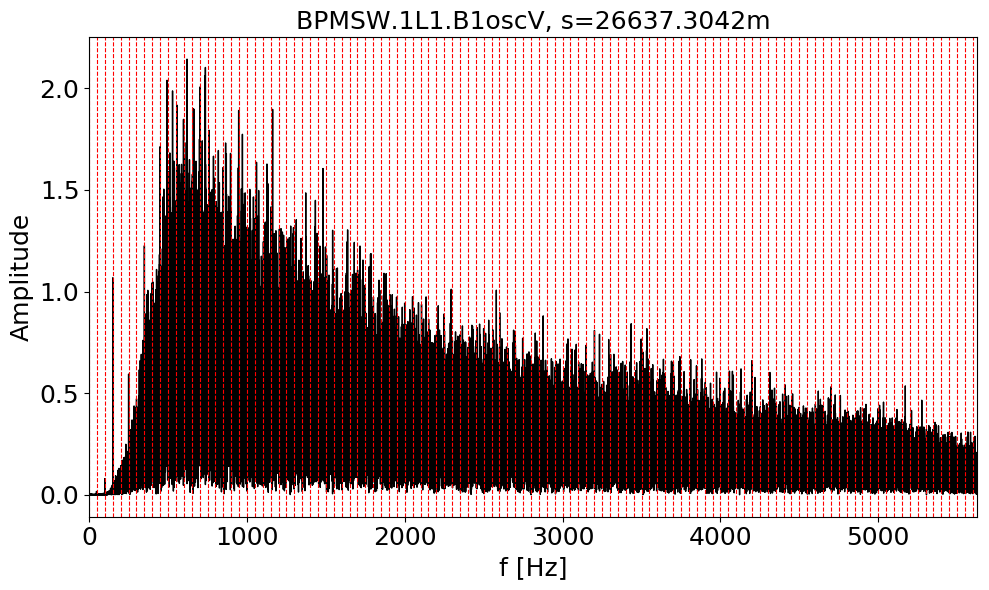

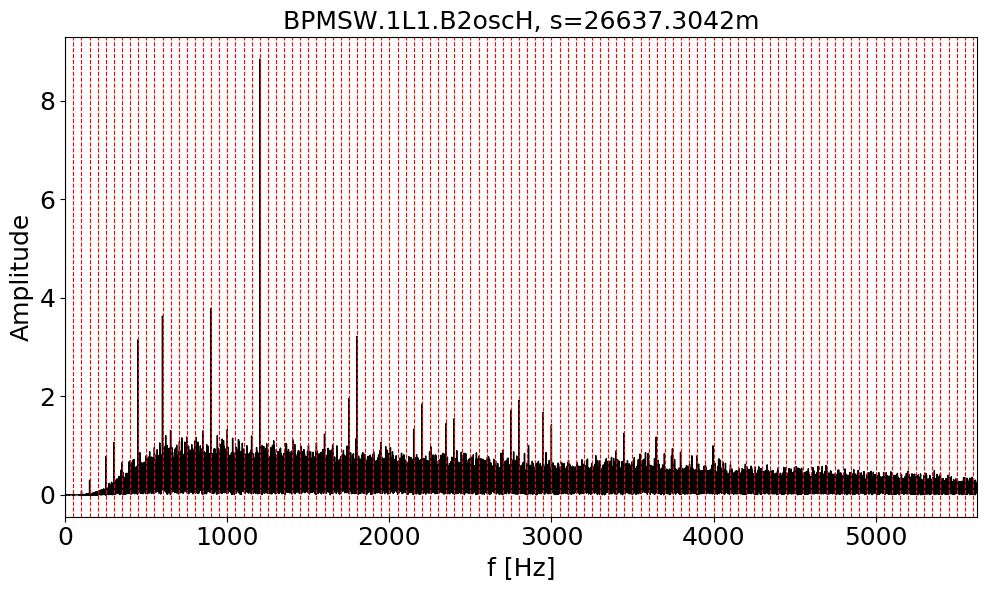

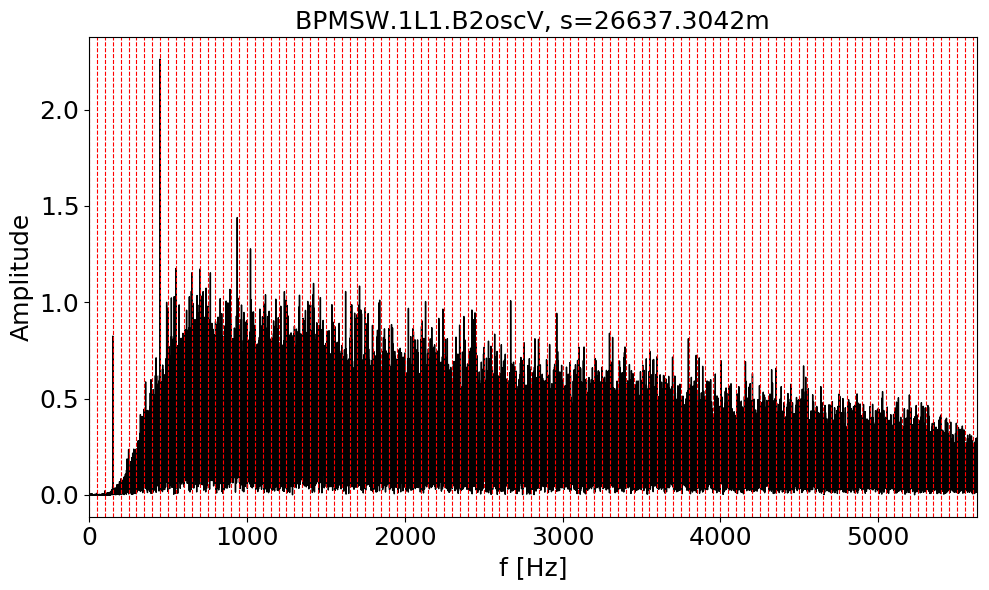

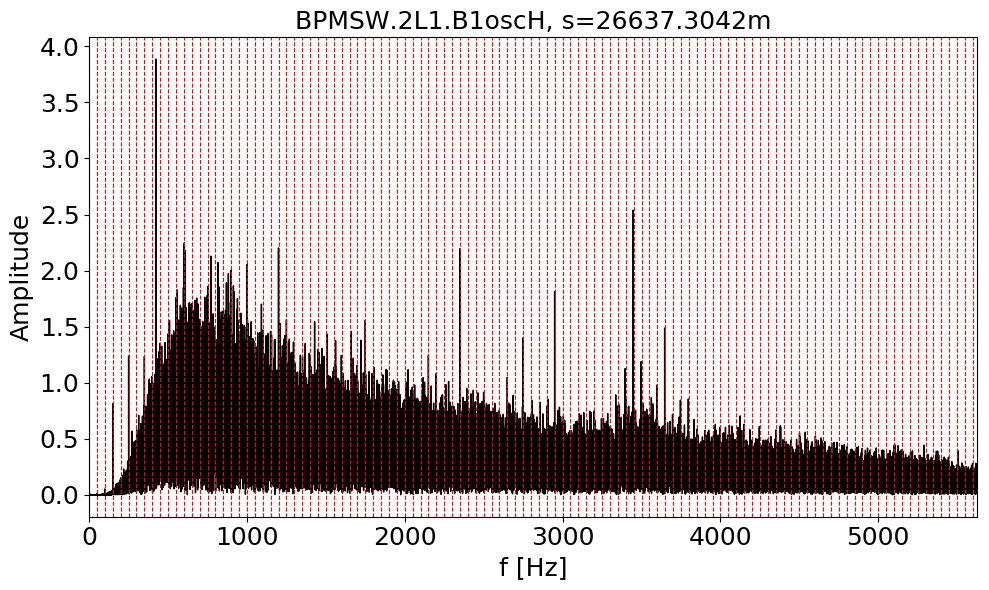

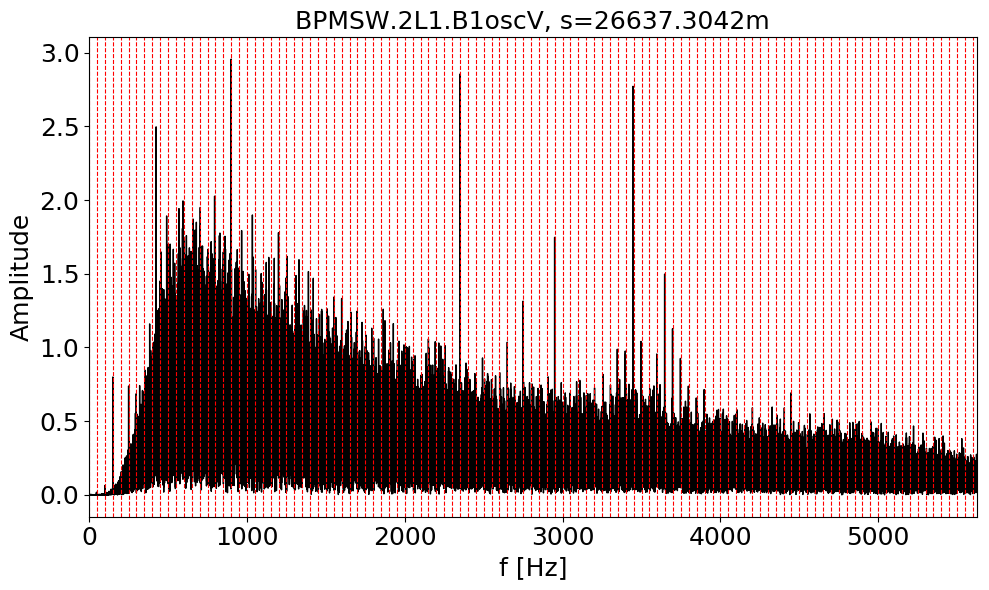

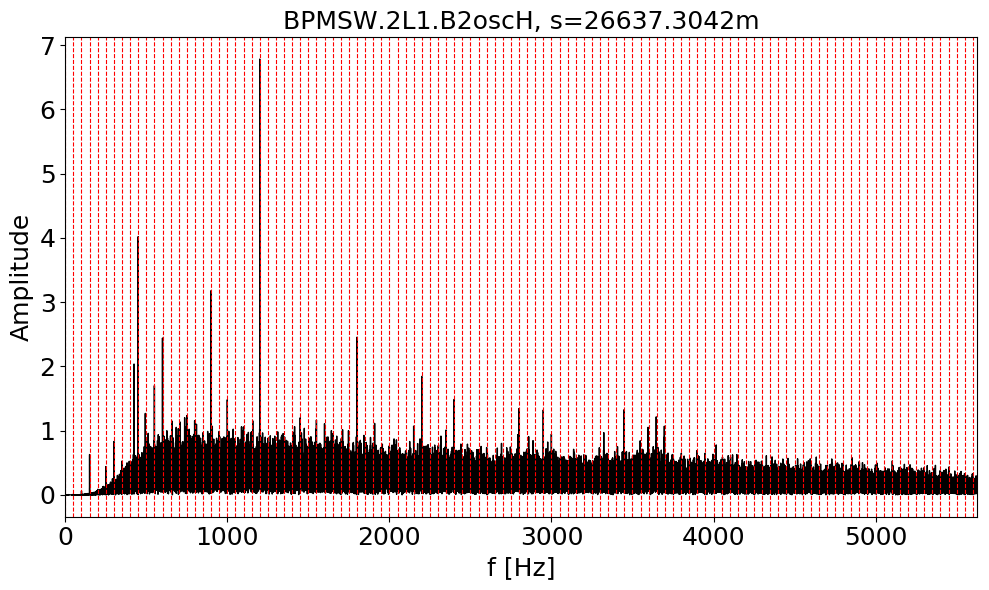

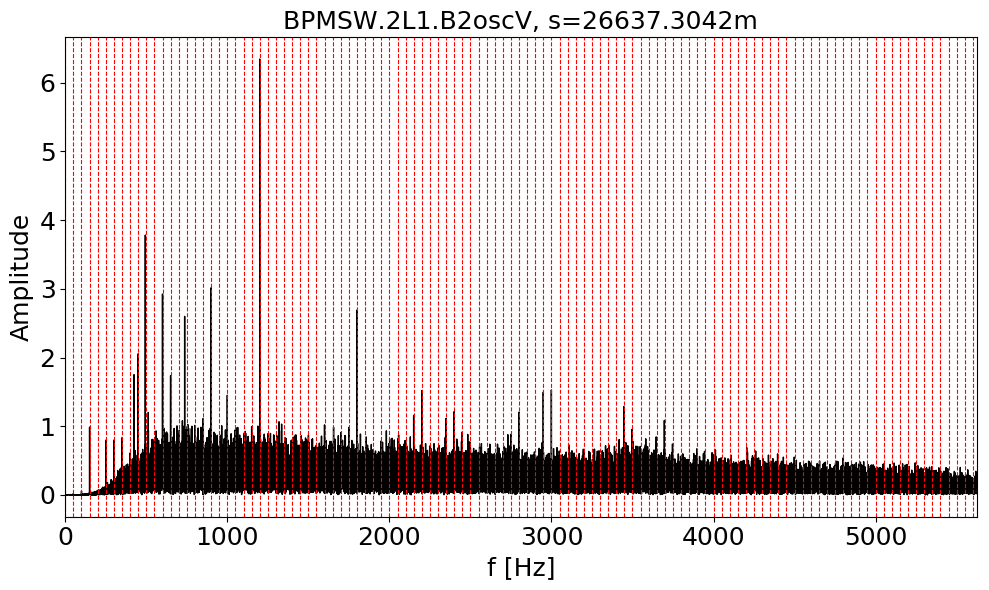

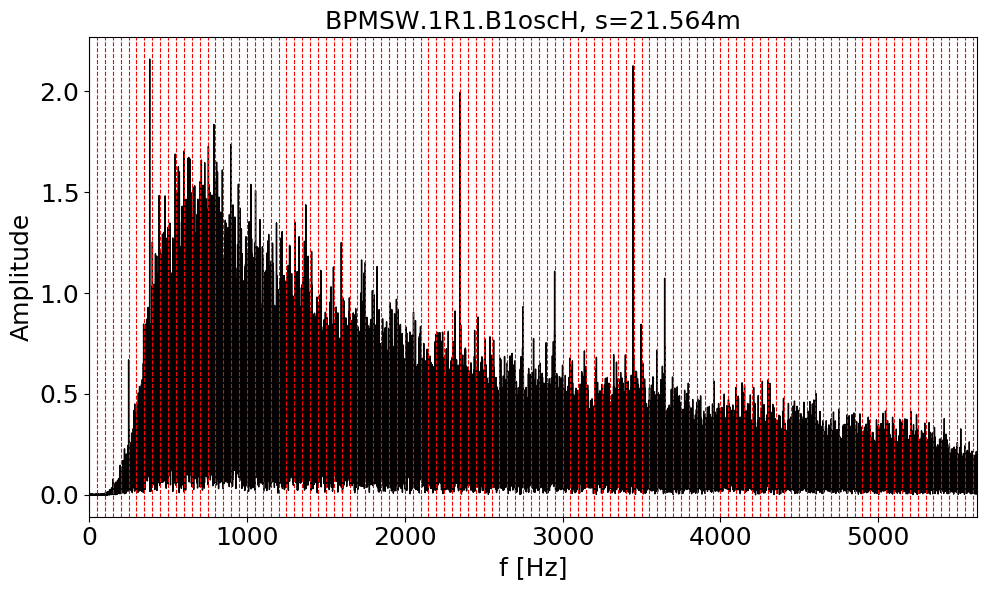

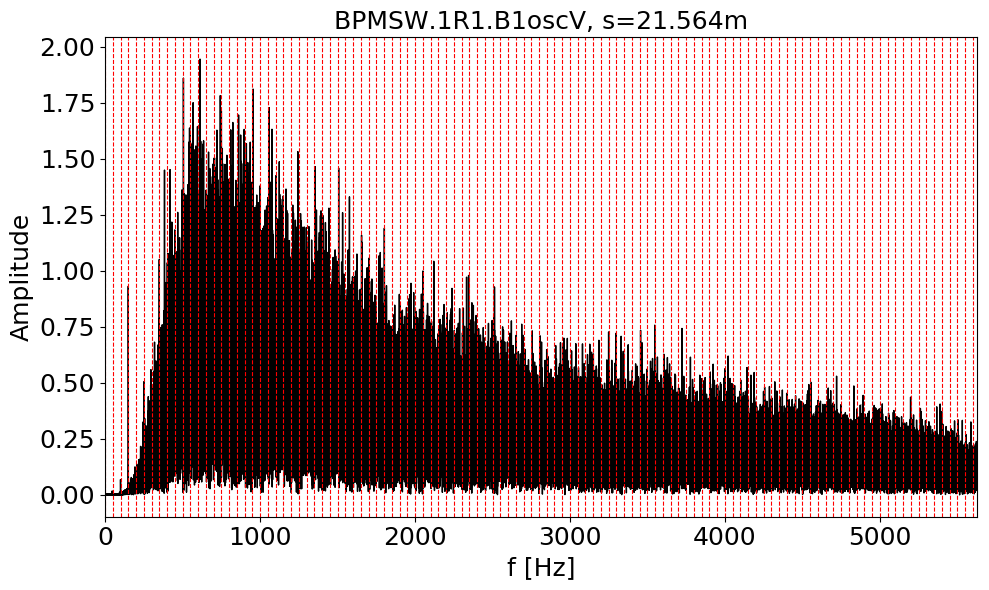

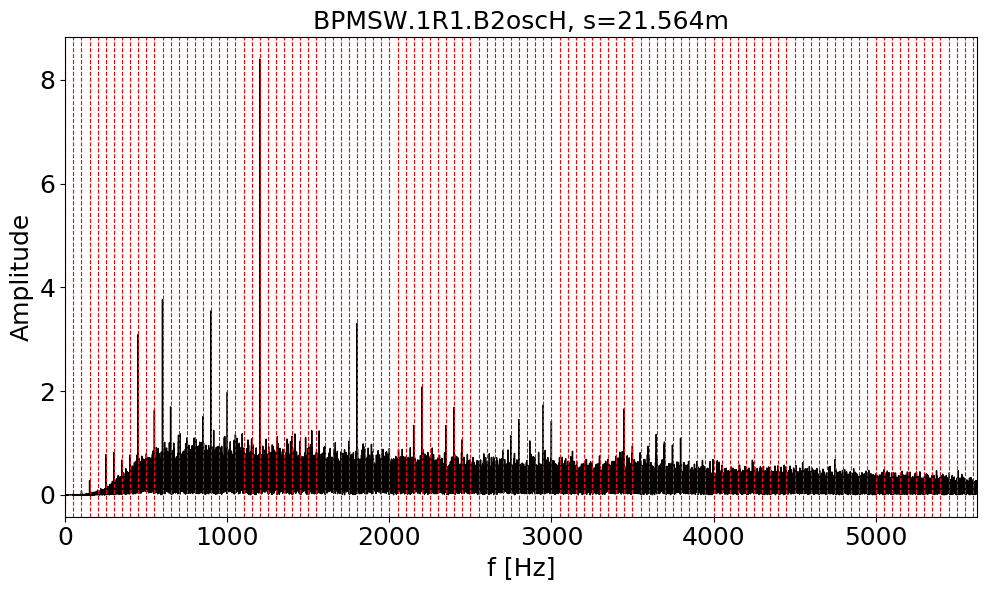

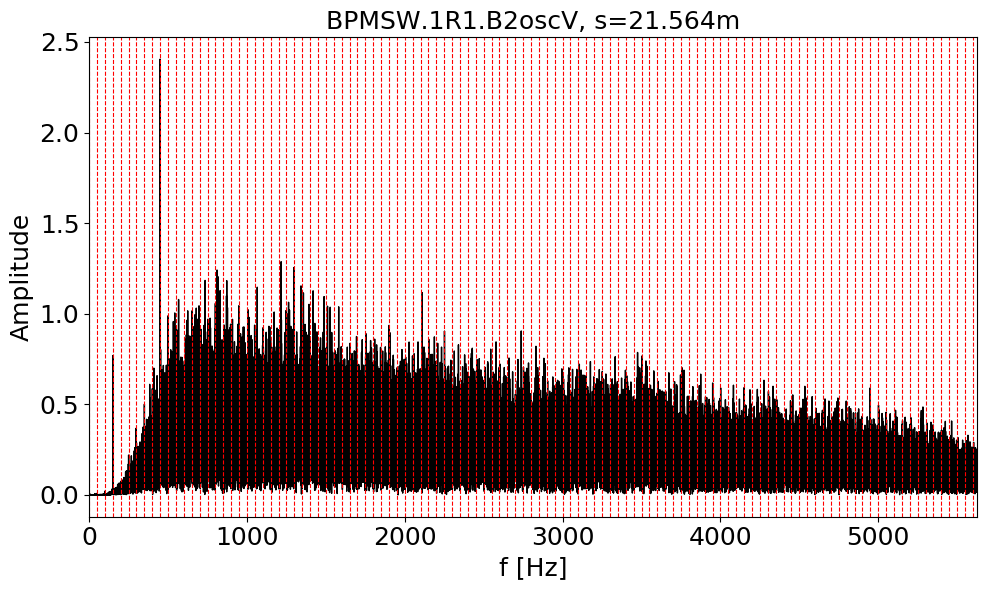

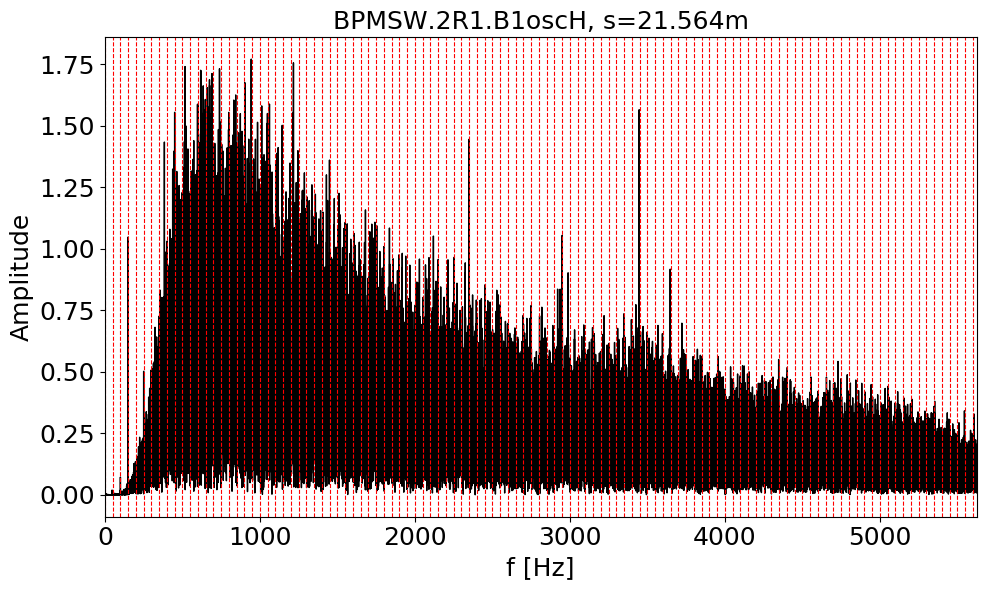

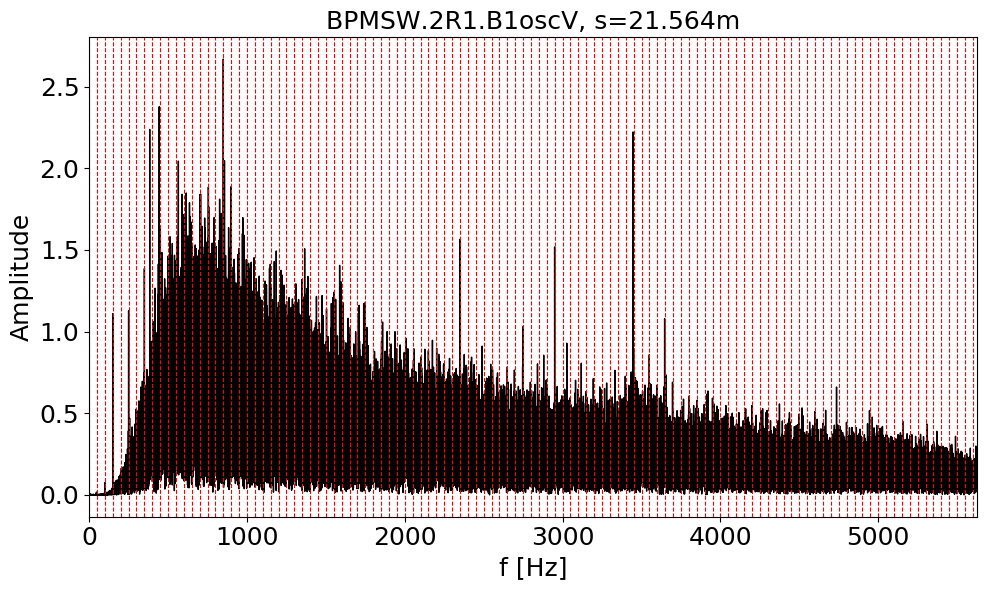

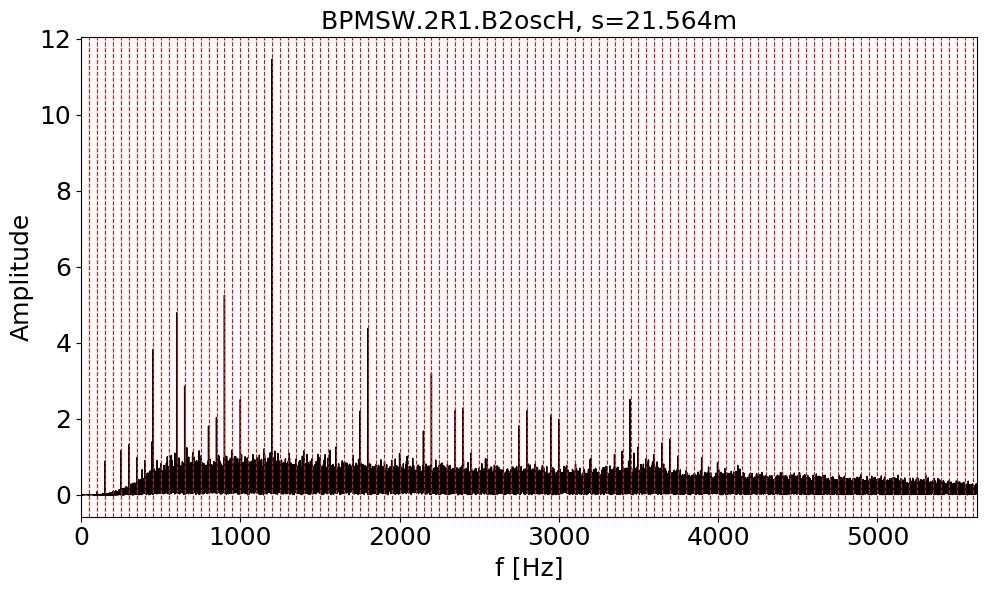

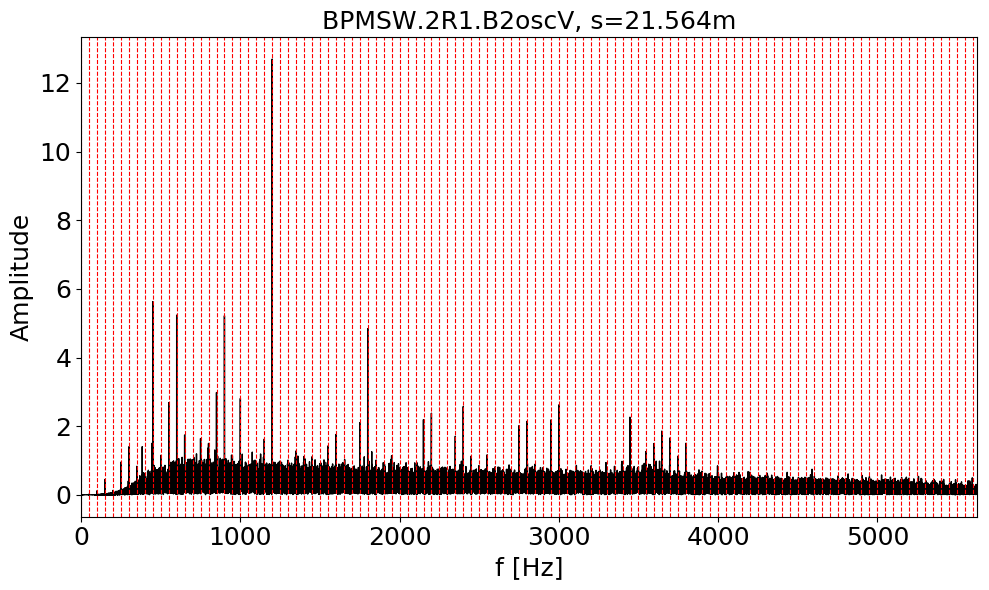

In [3]:
for stat in df.columns[2:]:
  if 'L1' in stat.split('.')[-2]:
    s = 26637.3042
  else:
    s = 21.564
  data = df[stat]
  frev = 11245.5031686
  fourier = np.fft.rfft(data)
  freqs = np.fft.rfftfreq(len(fourier)*2-1, 1./frev)
  fig1, ax1 = plt.subplots(figsize=(10,6))
  plt.plot(freqs, abs(fourier), c='k')
  for i in range(113):
    plt.axvline(i*50., linestyle='--', c='r', linewidth=0.8)
  plt.xlim(0, frev/2.0)
  plt.title('%s, s=%sm' %(stat,s))
  plt.ylabel('Amplitude')
  plt.xlabel('f [Hz]')
  plt.tight_layout()
  #plt.savefig('doros_plots/%s.png' %stat)
  #plt.close()
  plt.show()

# Sliding window 10k turns

In [50]:
modes = ['BPMSW.1L1.B1oscH','BPMSW.1L1.B1oscV','BPMSW.1L1.B2oscH','BPMSW.1L1.B2oscV','BPMSW.2L1.B1oscH','BPMSW.2L1.B1oscV','BPMSW.2L1.B2oscH','BPMSW.2L1.B2oscV','BPMSW.1R1.B1oscH','BPMSW.1R1.B1oscV','BPMSW.1R1.B2oscH','BPMSW.1R1.B2oscV','BPMSW.2R1.B1oscH','BPMSW.2R1.B1oscV','BPMSW.2R1.B2oscH','BPMSW.2R1.B2oscV']
lim =112
lists = [[] for j in range(lim)]
key = 'h'
n = 10000
df_fft     = dotdict.dotdict()


for j in range(len(modes)):
  stat = modes[j]
  if 'B1' in stat:
    beam = 'B1'
  else:
    beam = 'B2'
  if 'oscH' in stat:
    plane = 'H'
  else:
    plane = 'V'
  print stat, beam, plane
  for i in range(n,20000):
    #print i, len(df[stat])
    min_i = i-n
    data = np.array(df[stat])[min_i:i]
    fourier = np.fft.rfft(data)
    freqs = np.fft.rfftfreq(len(fourier)*2-1, 1./frev)  
    indexes = [int(k*50./frev*len(fourier)*2 ) for k in range(1,lim+1)]
    turns = min_i
    for j in range(len(indexes)):
      lists[j].append([stat,j, indexes[j],freqs[indexes[j]], fourier[indexes[j]], turns, beam, plane])
for j in range(lim):
  df_fft['%s%s' %(key,str(j))] = pd.DataFrame(data = lists[j], columns = ['status', 'h', 'bin','f','fourier',  'turns', 'beam', 'plane']) 
 

BPMSW.1L1.B1oscH B1 H
BPMSW.1L1.B1oscV B1 V
BPMSW.1L1.B2oscH B2 H
BPMSW.1L1.B2oscV B2 V
BPMSW.2L1.B1oscH B1 H
BPMSW.2L1.B1oscV B1 V
BPMSW.2L1.B2oscH B2 H
BPMSW.2L1.B2oscV B2 V
BPMSW.1R1.B1oscH B1 H
BPMSW.1R1.B1oscV B1 V
BPMSW.1R1.B2oscH B2 H
BPMSW.1R1.B2oscV B2 V
BPMSW.2R1.B1oscH B1 H
BPMSW.2R1.B1oscV B1 V
BPMSW.2R1.B2oscH B2 H
BPMSW.2R1.B2oscV B2 V


['BPMSW.1L1.B1oscH', 'BPMSW.2L1.B1oscH', 'BPMSW.1R1.B1oscH', 'BPMSW.2R1.B1oscH']


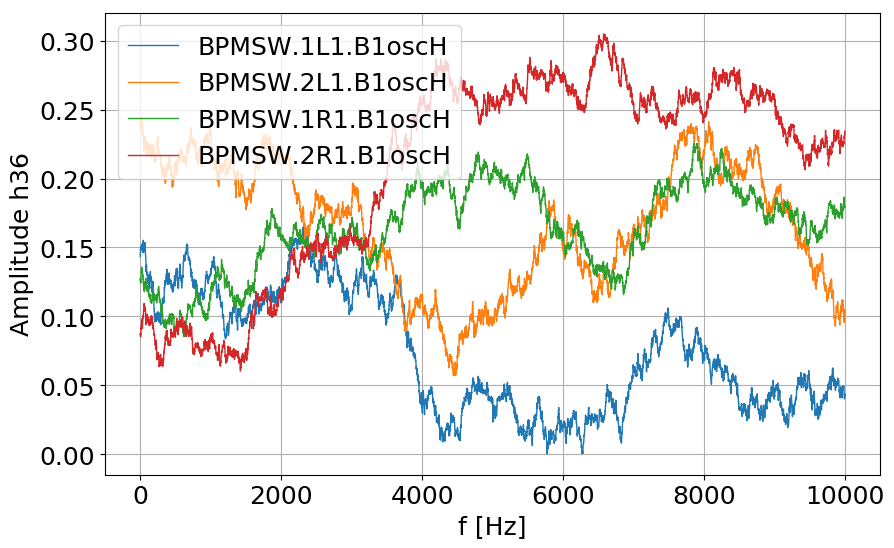

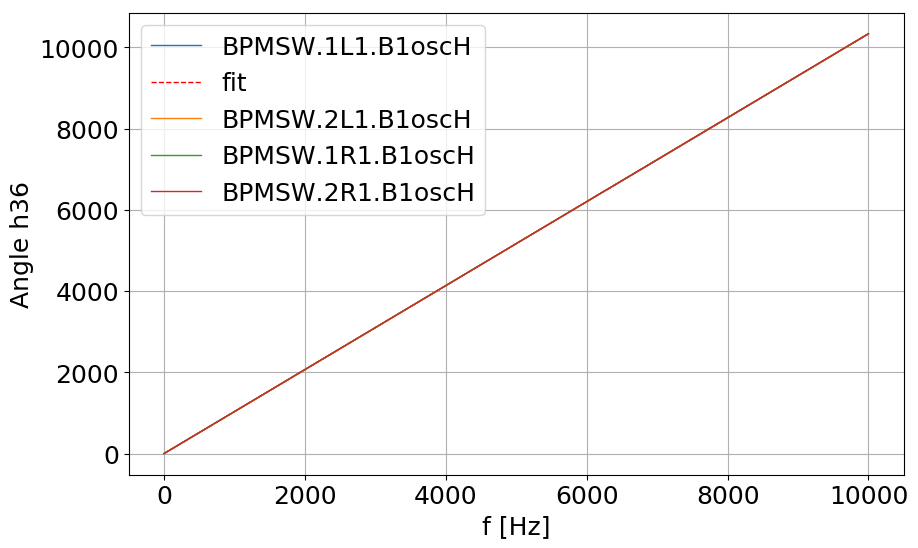

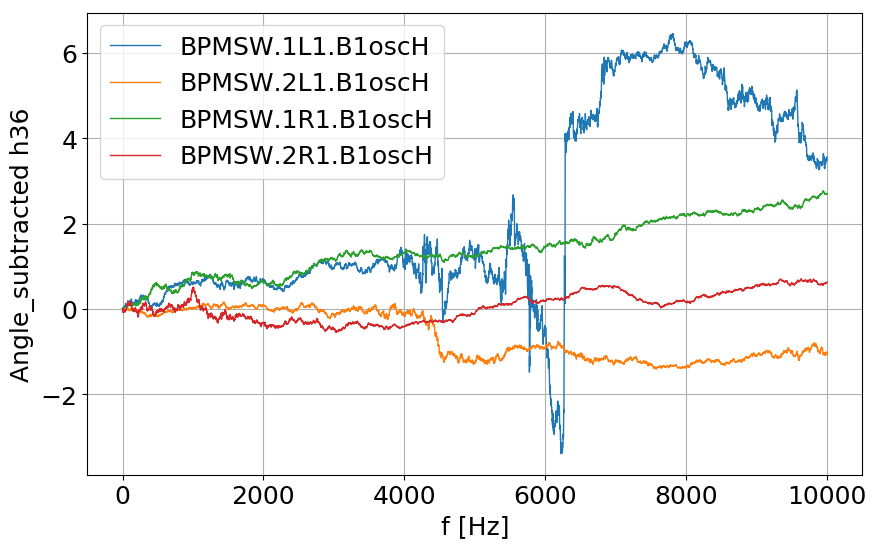

In [52]:
hs = [36]
modes_h = [i for i in modes if 'oscH' in i and 'B1' in i]
print modes_h
modes_v = [i for i in modes if 'oscV' in i]
for h in hs:
  fig1, ax1 = plt.subplots()
  plt.ylabel('Amplitude h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  fig2, ax2 = plt.subplots()
  plt.ylabel('Angle h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  fig3, ax3 = plt.subplots()
  plt.ylabel('Angle_subtracted h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  for i in range(len(modes_h)):
    stat = modes_h[i]
    h_curr = df_fft['h%s' %h][df_fft['h%s' %h]['status'] == modes_h[i]]
    plt.sca(ax1)
    plt.plot(np.array(h_curr['turns']),h_curr['fourier'].abs(), label=stat)
    plt.legend()
    plt.sca(ax2)
    signal1 = np.unwrap(np.angle(h_curr['fourier']))
    plt.plot(np.array(h_curr['turns']),signal1, label=stat)
    plt.legend()
    signal2 = signal1[0] + 2.0*np.pi*(h+1.)*50./frev*h_curr['turns']
    if i==0:
      plt.plot(np.array(h_curr['turns']),signal2, c='r', linestyle = '--', label='fit')
    plt.sca(ax3)
    plt.plot(h_curr['turns'],signal2-signal1, label=stat)
    plt.legend()
plt.show()

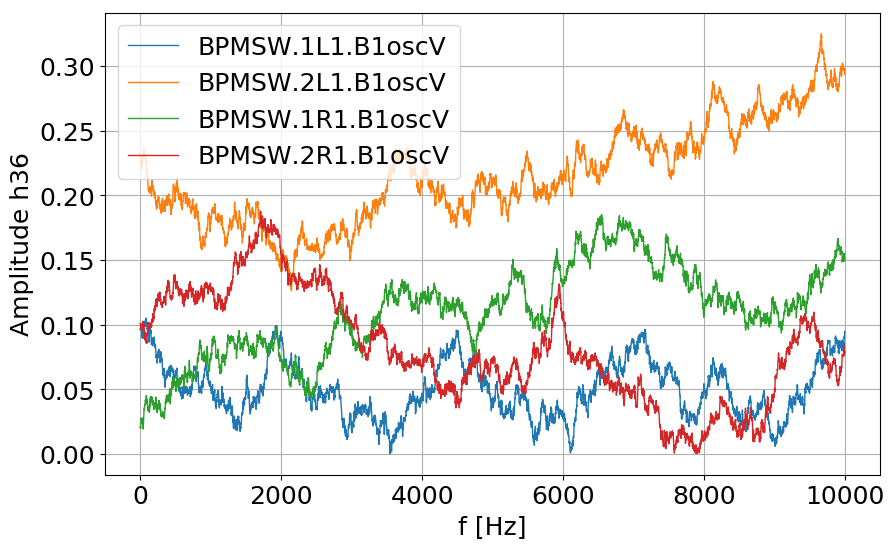

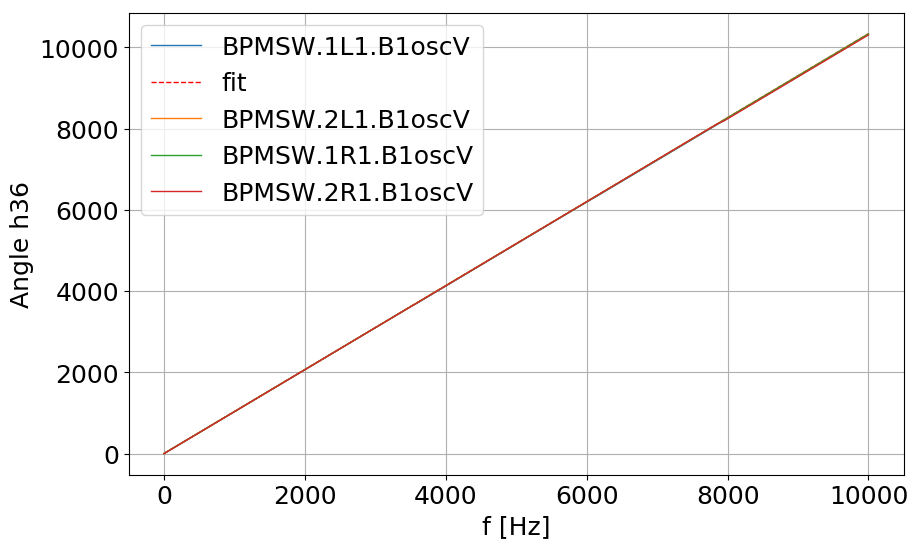

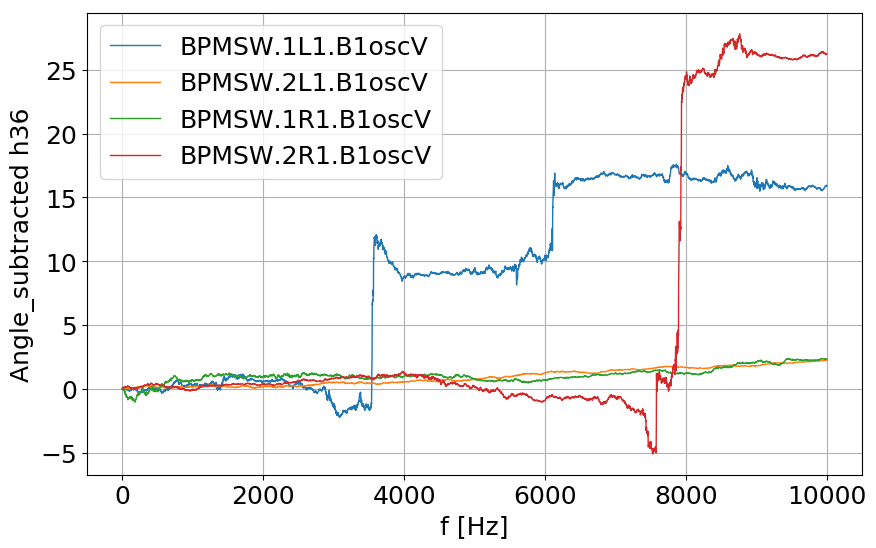

In [54]:
hs = [36]
modes_h = [i for i in modes if 'oscH' in i and 'B1' in i]
modes_v = [i for i in modes if 'oscV' in i and 'B1' in i]
for h in hs:
  fig1, ax1 = plt.subplots()
  plt.ylabel('Amplitude h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  fig2, ax2 = plt.subplots()
  plt.ylabel('Angle h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  fig3, ax3 = plt.subplots()
  plt.ylabel('Angle_subtracted h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  for i in range(len(modes_v)):
    stat = modes_v[i]
    h_curr = df_fft['h%s' %h][df_fft['h%s' %h]['status'] == modes_v[i]]
    plt.sca(ax1)
    plt.plot(np.array(h_curr['turns']),h_curr['fourier'].abs(), label=stat)
    plt.legend()
    plt.sca(ax2)
    signal1 = np.unwrap(np.angle(h_curr['fourier']))
    plt.plot(np.array(h_curr['turns']),signal1, label=stat)
    plt.legend()
    signal2 = signal1[0] + 2.0*np.pi*(h+1.)*50./frev*h_curr['turns']
    if i==0:
      plt.plot(np.array(h_curr['turns']),signal2, c='r', linestyle = '--', label='fit')
    plt.sca(ax3)
    plt.plot(h_curr['turns'],signal2-signal1, label=stat)
    plt.legend()
plt.show()

['BPMSW.1L1.B2oscH', 'BPMSW.2L1.B2oscH', 'BPMSW.1R1.B2oscH', 'BPMSW.2R1.B2oscH']


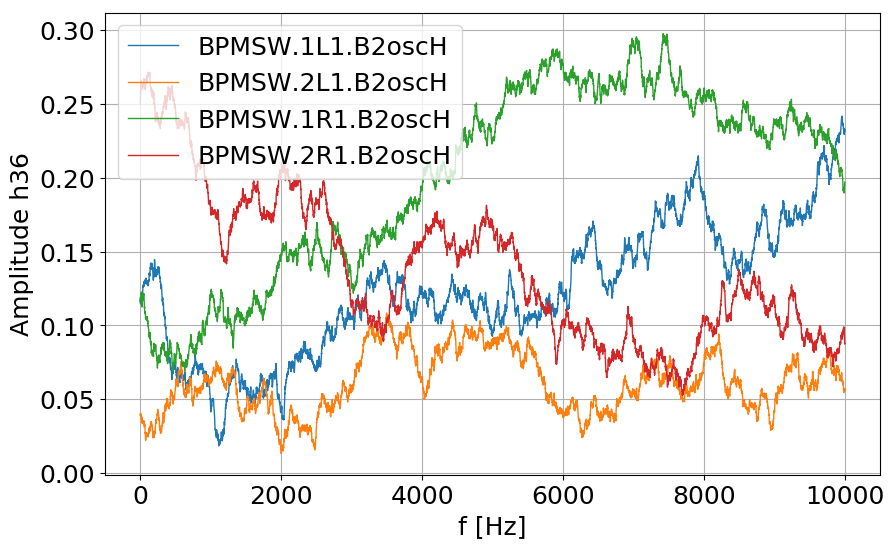

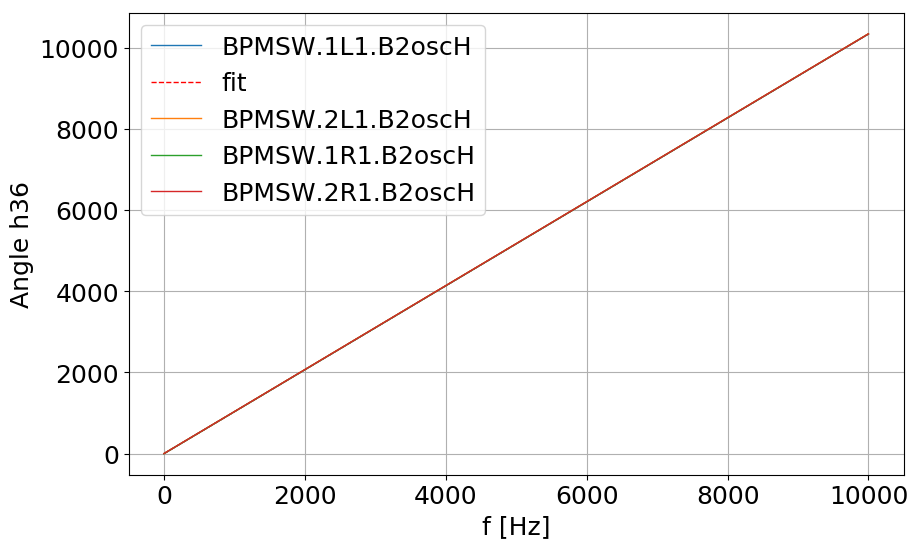

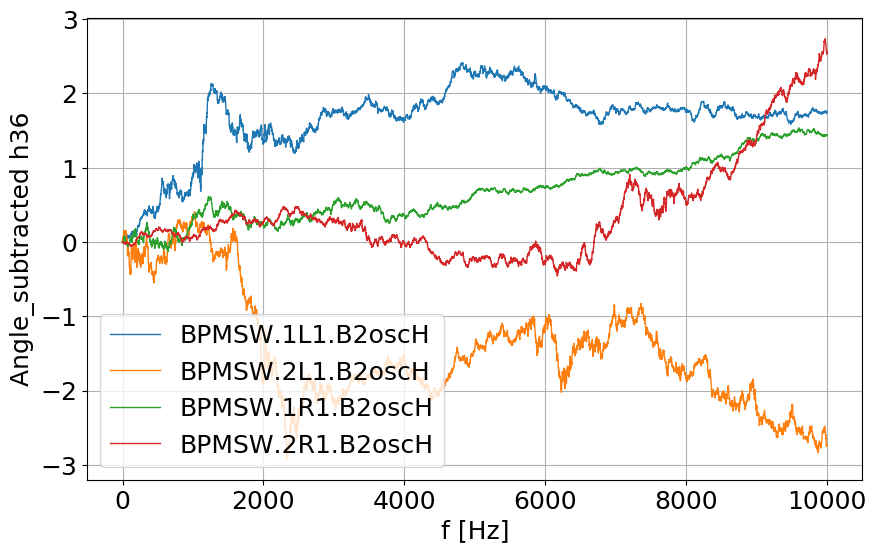

In [55]:
hs = [36]
modes_h = [i for i in modes if 'oscH' in i and 'B2' in i]
print modes_h
modes_v = [i for i in modes if 'oscV' in i]
for h in hs:
  fig1, ax1 = plt.subplots()
  plt.ylabel('Amplitude h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  fig2, ax2 = plt.subplots()
  plt.ylabel('Angle h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  fig3, ax3 = plt.subplots()
  plt.ylabel('Angle_subtracted h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  for i in range(len(modes_h)):
    stat = modes_h[i]
    h_curr = df_fft['h%s' %h][df_fft['h%s' %h]['status'] == modes_h[i]]
    plt.sca(ax1)
    plt.plot(np.array(h_curr['turns']),h_curr['fourier'].abs(), label=stat)
    plt.legend()
    plt.sca(ax2)
    signal1 = np.unwrap(np.angle(h_curr['fourier']))
    plt.plot(np.array(h_curr['turns']),signal1, label=stat)
    plt.legend()
    signal2 = signal1[0] + 2.0*np.pi*(h+1.)*50./frev*h_curr['turns']
    if i==0:
      plt.plot(np.array(h_curr['turns']),signal2, c='r', linestyle = '--', label='fit')
    plt.sca(ax3)
    plt.plot(h_curr['turns'],signal2-signal1, label=stat)
    plt.legend()
plt.show()

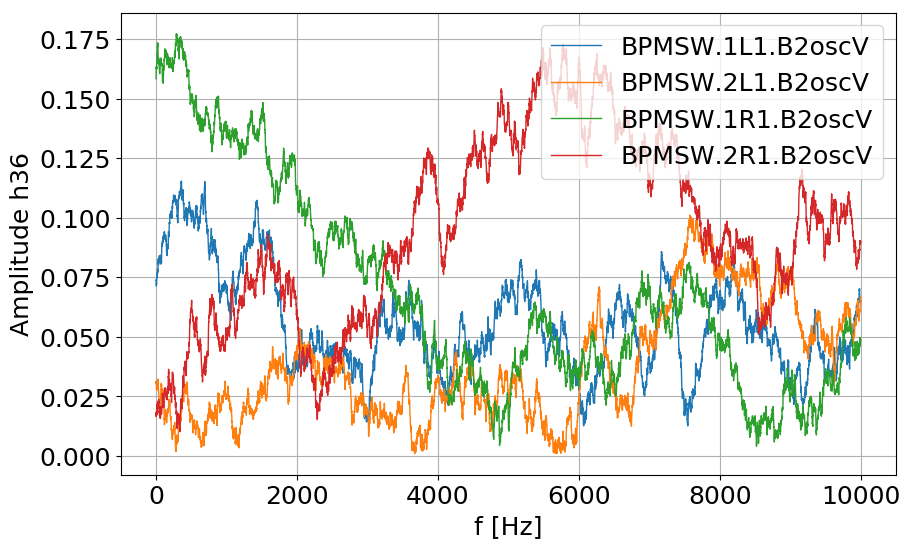

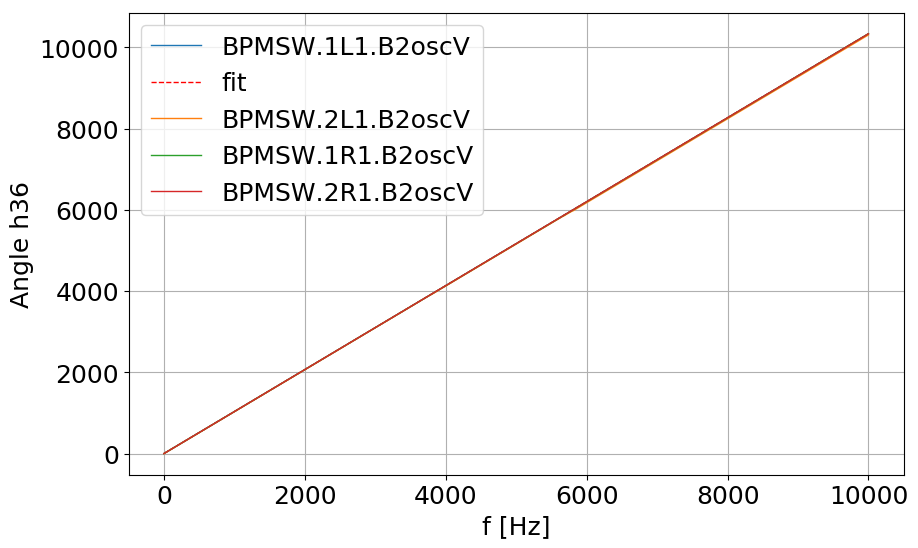

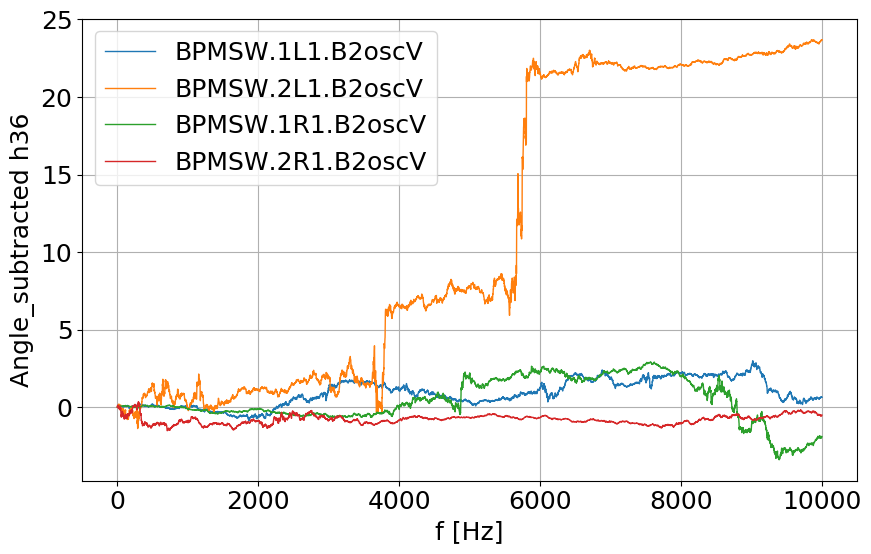

In [56]:
hs = [36]
modes_h = [i for i in modes if 'oscH' in i and 'B2' in i]
modes_v = [i for i in modes if 'oscV' in i and 'B2' in i]
for h in hs:
  fig1, ax1 = plt.subplots()
  plt.ylabel('Amplitude h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  fig2, ax2 = plt.subplots()
  plt.ylabel('Angle h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  fig3, ax3 = plt.subplots()
  plt.ylabel('Angle_subtracted h%s' %h)
  plt.xlabel('f [Hz]')
  plt.grid()
  for i in range(len(modes_v)):
    stat = modes_v[i]
    h_curr = df_fft['h%s' %h][df_fft['h%s' %h]['status'] == modes_v[i]]
    plt.sca(ax1)
    plt.plot(np.array(h_curr['turns']),h_curr['fourier'].abs(), label=stat)
    plt.legend()
    plt.sca(ax2)
    signal1 = np.unwrap(np.angle(h_curr['fourier']))
    plt.plot(np.array(h_curr['turns']),signal1, label=stat)
    plt.legend()
    signal2 = signal1[0] + 2.0*np.pi*(h+1.)*50./frev*h_curr['turns']
    if i==0:
      plt.plot(np.array(h_curr['turns']),signal2, c='r', linestyle = '--', label='fit')
    plt.sca(ax3)
    plt.plot(h_curr['turns'],signal2-signal1, label=stat)
    plt.legend()
plt.show()